In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Plotting the data 

Text(0, 0.5, ' PM 2.5 value')

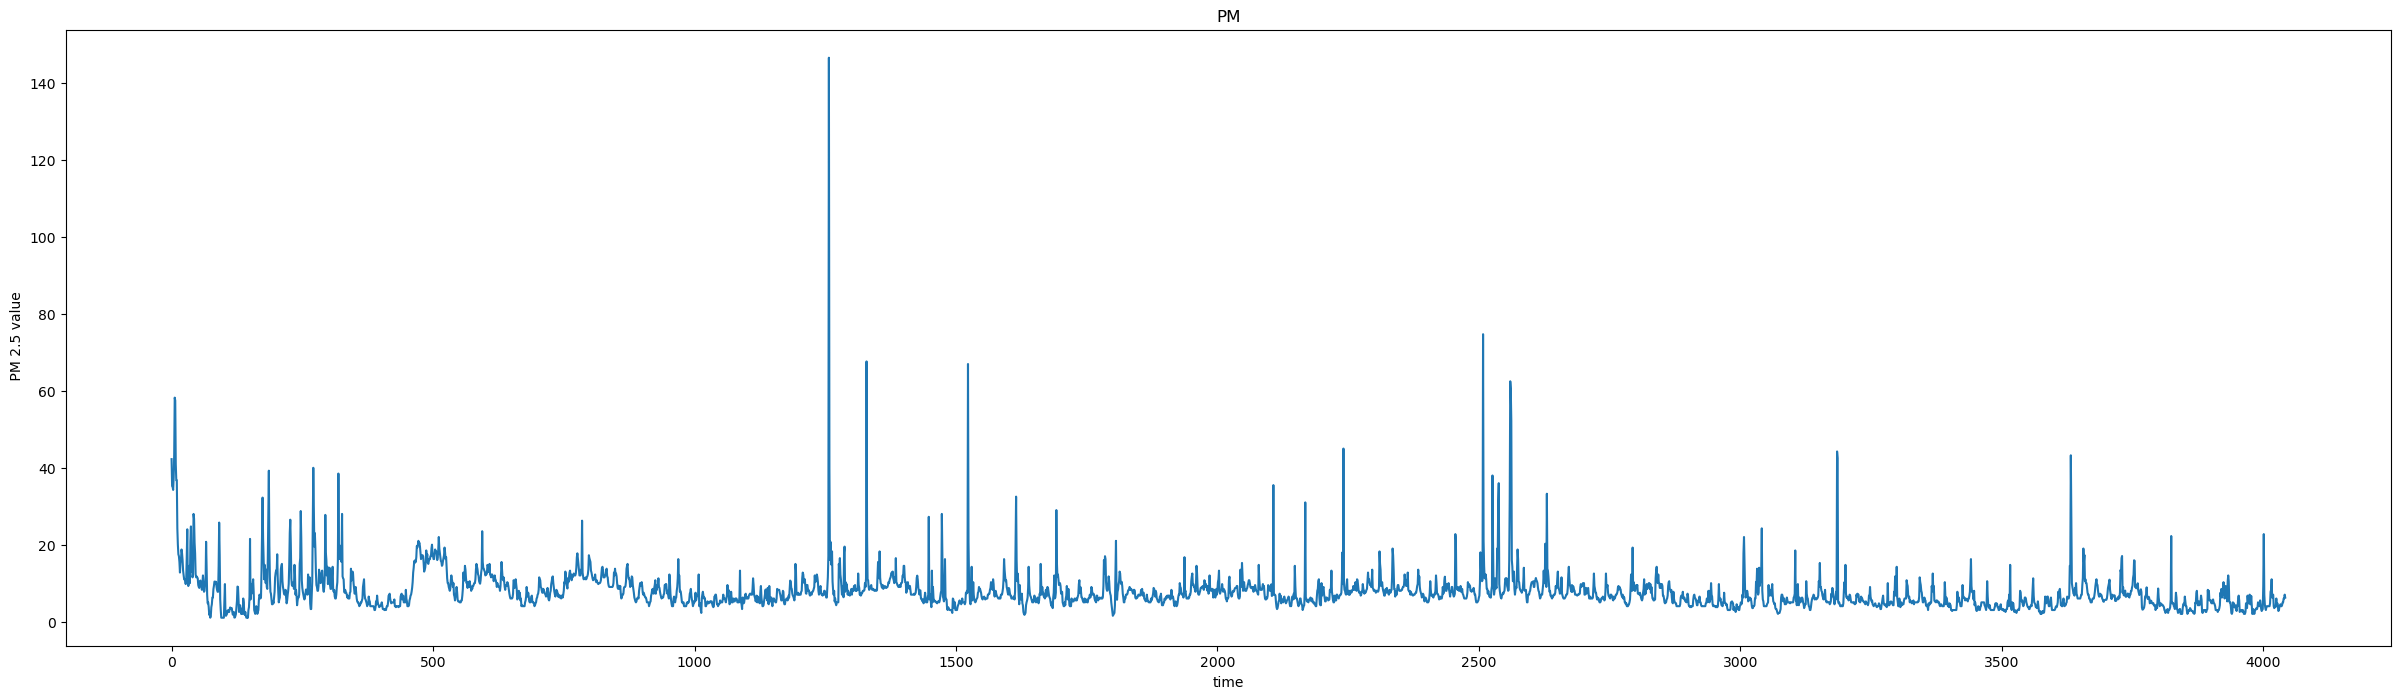

In [3]:
df=pd.read_csv('31_Jaffna_hourly.csv')
df.rename(columns={'Unnamed: 0':'id','timestamp_index':'time','PM2.5 (ug/m3)':'pm25'},inplace=True)
plt.figure(figsize=(30, 8))
plt.plot(df['pm25'])
plt.title("PM")
plt.xlabel('time')
plt.ylabel(' PM 2.5 value')

Detecting outliers using Z score

Outliers detected:
                     PM1.0 (ug/m3)    PM25  PM4.0 (ug/m3)  PM10.0 (ug/m3)  \
time                                                                        
2023-04-27 00:00:00          39.75   42.25          42.75           43.00   
2023-04-27 01:00:00          32.50   35.25          35.50           36.00   
2023-04-27 02:00:00          32.50   35.00          35.50           35.75   
2023-04-27 03:00:00          31.75   34.25          34.75           35.00   
2023-04-27 04:00:00          34.75   37.50          38.00           38.25   
2023-04-27 05:00:00          40.50   43.50          44.00           44.50   
2023-04-27 06:00:00          55.00   58.25          59.00           59.25   
2023-04-27 07:00:00          53.75   57.50          57.75           58.25   
2023-04-27 08:00:00          37.75   41.00          41.50           42.00   
2023-04-27 09:00:00          34.25   36.75          37.00           37.25   
2023-04-27 10:00:00          34.00   36.75          37.25

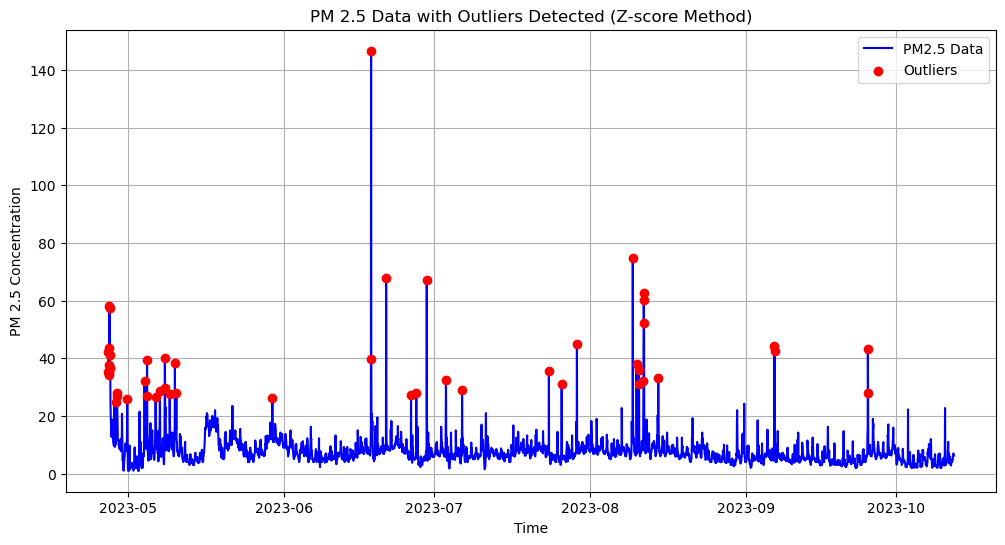

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("31_Jaffna_hourly.csv")

# Rename columns to match
data.rename(columns={'Unnamed: 0':'id','timestamp_index':'time','PM2.5 (ug/m3)':'PM25'}, inplace=True)

# Convert 'time' to datetime and set as index
data["time"] = pd.to_datetime(data["time"])
data.set_index("time", inplace=True)

# Calculate the Z-score for PM2.5 data
from scipy.stats import zscore

# Compute Z-scores for the PM2.5 column
data['z_score'] = zscore(data['PM25'])

# Define a threshold for outlier detection (e.g., Z > 3 or Z < -3)
threshold = 3

# Identify outliers (where absolute Z-score is greater than threshold)
outliers = data[abs(data['z_score']) > threshold]

# Print outliers
print(f"Outliers detected:\n{outliers}")

# Plot the data along with outliers
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PM25'], label="PM2.5 Data", color='blue')
plt.scatter(outliers.index, outliers['PM25'], color='red', label="Outliers", zorder=5)
plt.xlabel('Time')
plt.ylabel('PM 2.5 Concentration')
plt.title("PM 2.5 Data with Outliers Detected (Z-score Method)")
plt.legend()
plt.grid(True)
plt.show()


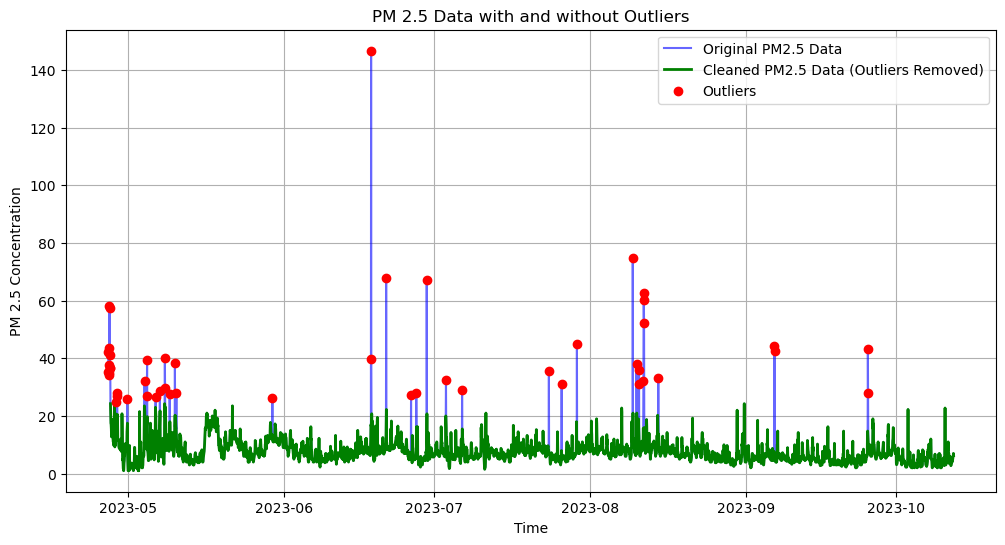

In [19]:
# Remove outliers
data_cleaned = data[abs(data['z_score']) <= threshold]

# Plot the original and cleaned data
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(data.index, data['PM25'], label="Original PM2.5 Data", color='blue', alpha=0.6)

# Plot cleaned data (after removing outliers)
plt.plot(data_cleaned.index, data_cleaned['PM25'], label="Cleaned PM2.5 Data (Outliers Removed)", color='green', linewidth=2)

# Highlight the outliers
plt.scatter(outliers.index, outliers['PM25'], color='red', label="Outliers", zorder=5)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('PM 2.5 Concentration')
plt.title("PM 2.5 Data with and without Outliers")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
outliers=[]
def find_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [7]:
a=find_outliers(df['pm25'])

In [9]:
df = pd.read_csv('31_Jaffna_hourly.csv')
df.rename(columns={'Unnamed: 0':'id','PM2.5 (ug/m3)':'pm25','timestamp_index':'time'},inplace=True)
data=df['pm25']
mean=np.mean(data)
std=np.std(data)
filt=(np.abs((data-mean)/std) > 3)
print(mean)
new_mean=np.mean(data.loc[~filt])
df = df.replace(filt,new_mean)

7.818587682414049


In [11]:
df.rename(columns={'Unnamed: 0':'id','PM2.5 (ug/m3)':'pm25','timestamp_index':'time','Temperature (Celsius)':'temp'},inplace=True) 
df['pm222']=df['pm25']+df['temp']

In [13]:
#ploting the pm 2.5 value in all stations
def plot_stations(station):
    
    
    df = pd.read_csv(station,parse_dates=['timestamp_index'],index_col=['timestamp_index'])
        #read the csv files,convert timestamps to datetime , set the timestamp column as index coulmn
    df['index'] = range(len(df))
    
    df.rename(columns={'PM2.5 (ug/m3)':'pm25','timestamp_index':'time'},inplace=True)
    data=df['pm25']
    mean=np.mean(data)
    std=np.std(data)
    filt=(np.abs((data-mean)/std) > 3)
    
    new_mean=np.mean(data.loc[~filt])
   
    data.loc[filt]=np.nan
    df.interpolate(method='time',inplace=True,limit_direction='both')
    
    plt.figure(figsize=(30, 8))
    plt.plot(data)  #plotting the data
    title='PM2.5 concentration value of '+station.split('_')[1]+' station ' 
    df.to_csv(title+'1.1.csv',columns=['index','pm25','Temperature (Celsius)'])
    
    plt.title(title)
    plt.xlabel('time')
    plt.ylabel(' PM 2.5 value')

C:\Users\USER\AppData\Local\Temp\ipykernel_12084\3128365395.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[filt]=np.nan


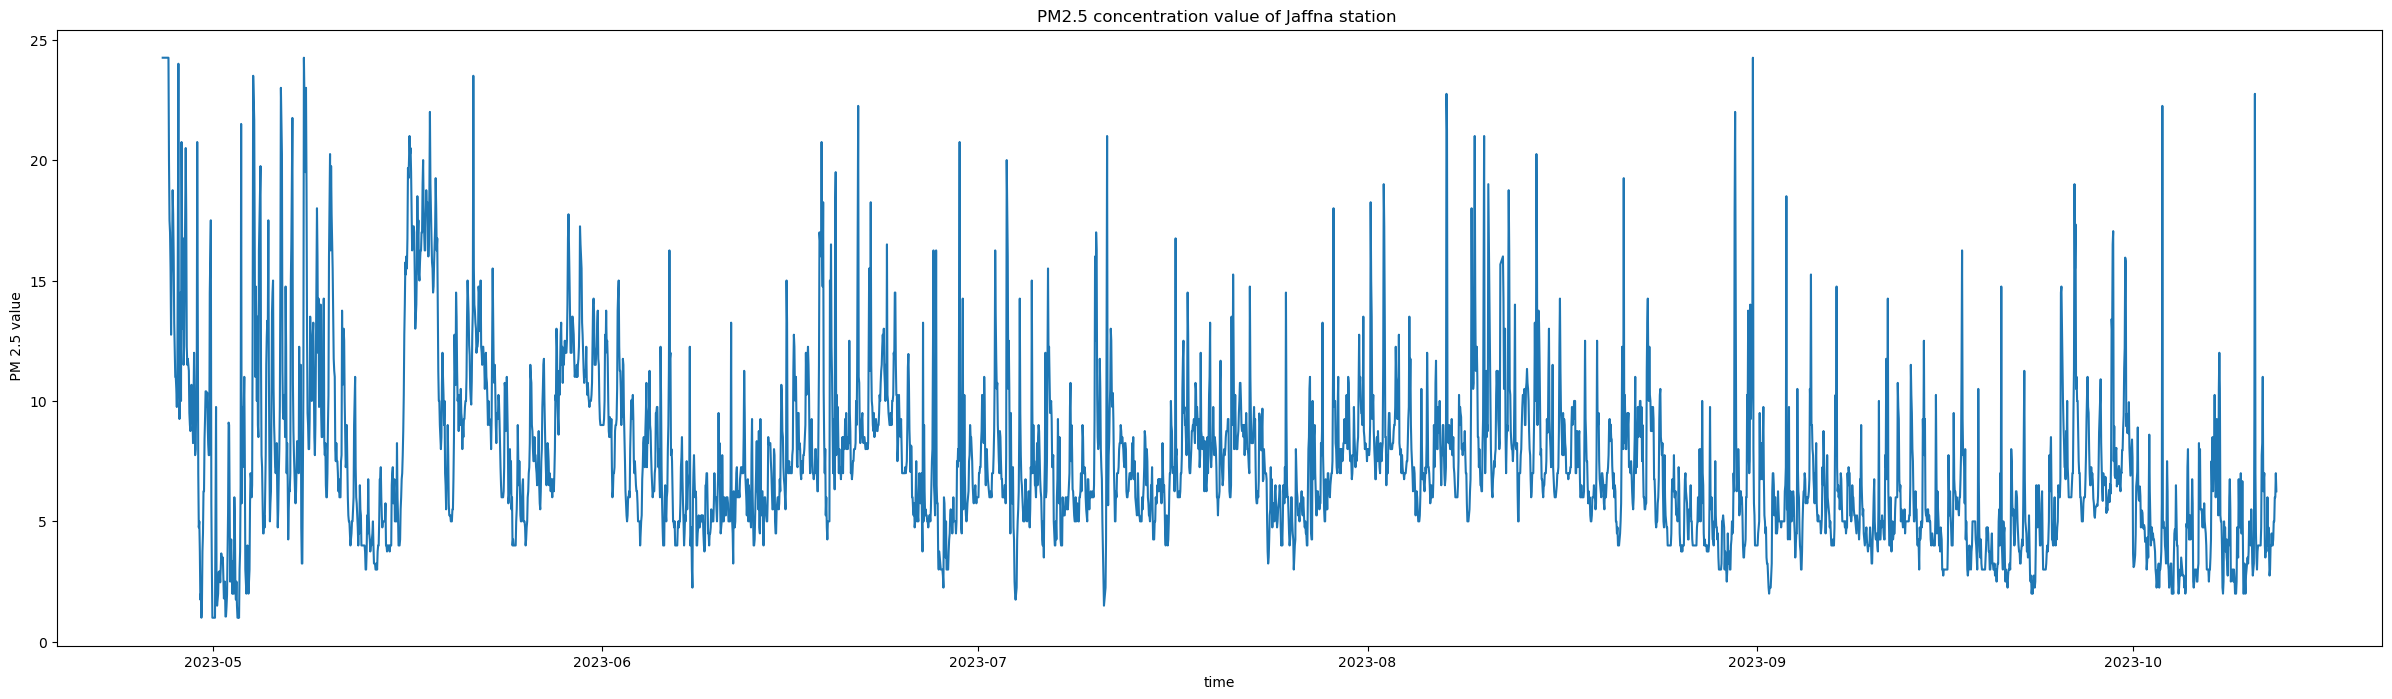

In [15]:
plot_stations('31_Jaffna_hourly.csv')